In [7]:
from google.colab import drive


In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
filename = '/content/drive/MyDrive/DATASET/UrbanSound8K/Drilling.wav'


In [11]:
!pip3 install resampy

In [12]:
import IPython.display as ipd
import librosa
import librosa.display
import resampy

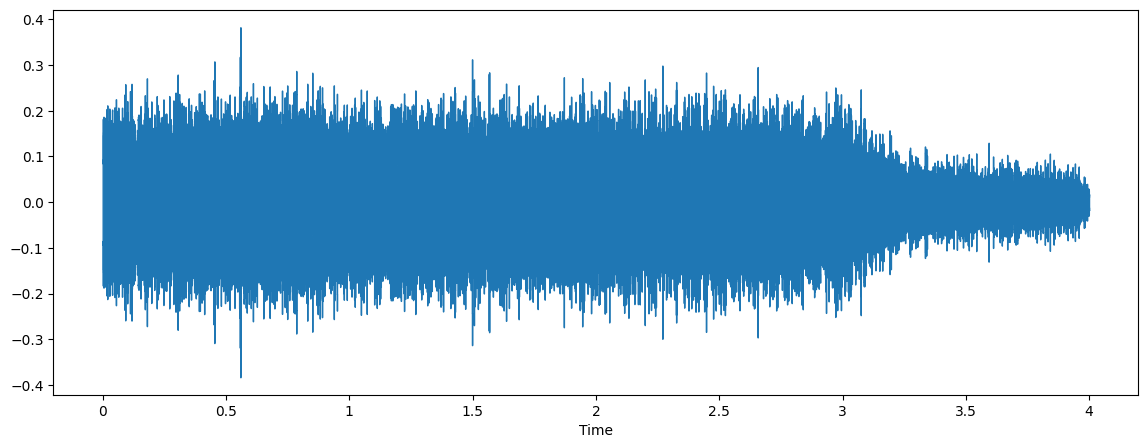

In [13]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [14]:
sample_rate

22050

In [15]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [16]:
wave_sample_rate

48000

In [17]:
wave_audio

array([[-3436, -2639],
       [-1485, -1538],
       [ -492,  -334],
       ...,
       [  502,   616],
       [  253,   322],
       [  280,   140]], dtype=int16)

In [18]:
data

array([-0.04178393, -0.0571964 ,  0.09306112, ..., -0.01147891,
       -0.01110151,  0.01240711], dtype=float32)

In [19]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/DATASET/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [20]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [21]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/DATASET/UrbanSound8K/Car_horn.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [22]:
print(librosa_audio_data)

[-0.02577092 -0.06775762 -0.1037484  ...  0.03035414 -0.0263846
 -0.03195709]


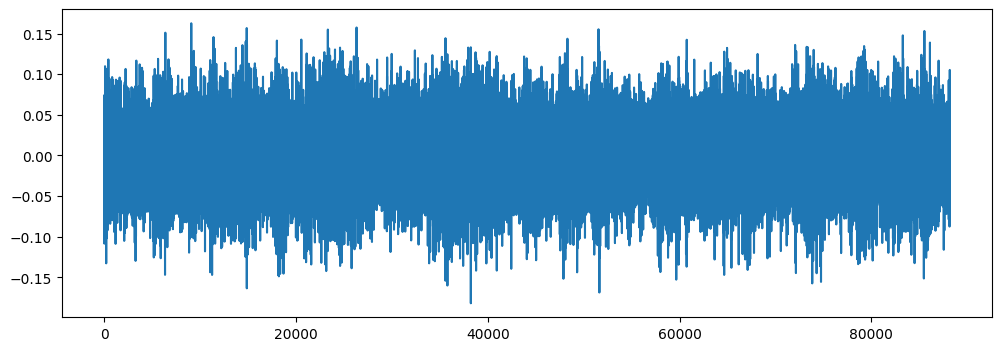

In [23]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [24]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [25]:
wave_audio

array([ -862, -2750, -3631, ...,  2833,   519, -1260], dtype=int16)

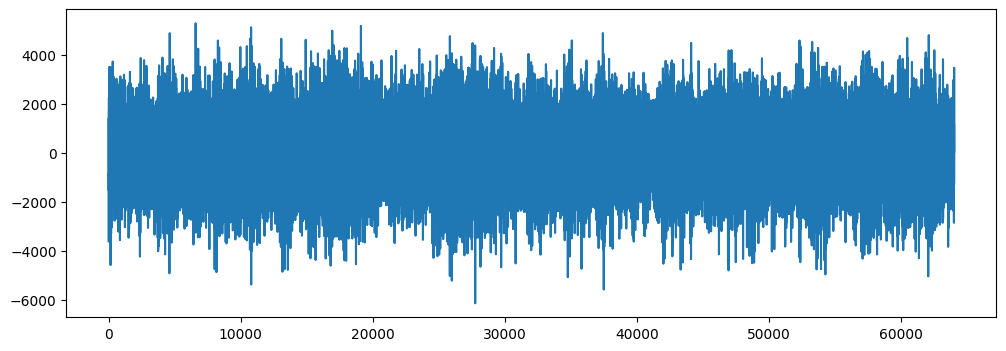

In [26]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [27]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)


(40, 173)


In [28]:
mfccs

array([[-2.48227402e+02, -2.41419342e+02, -2.50133972e+02, ...,
        -2.60584717e+02, -2.36613831e+02, -2.23846161e+02],
       [ 1.64178741e+02,  1.87226227e+02,  1.95220734e+02, ...,
         1.82146362e+02,  1.56354523e+02,  1.19650391e+02],
       [-1.23421471e+02, -1.44409729e+02, -1.52373428e+02, ...,
        -1.54237305e+02, -1.30670898e+02, -1.02509964e+02],
       ...,
       [-1.72058563e+01, -2.04236660e+01, -1.94170532e+01, ...,
        -8.08853245e+00, -3.81285000e+00, -6.20251942e+00],
       [ 2.04675961e+00,  2.62479484e-01,  3.93861151e+00, ...,
         3.37576294e+00,  5.20795918e+00,  8.55937123e-01],
       [ 6.94285107e+00,  6.63454008e+00,  5.93904686e+00, ...,
        -4.73258376e-01,  2.20286429e-01, -6.53864264e-01]], dtype=float32)

In [29]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/DATASET/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/DATASET/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [30]:
##!pip3 install resampy

In [31]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [32]:
##!pip install resampy

In [33]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:43,  9.01it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [35:17,  3.21it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [35:18,  3.36it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [38:00,  3.83it/s]


In [34]:

### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520653, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [35]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [36]:
X.shape

(8732, 40)

In [37]:
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [38]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [39]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746937e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [42]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
X_train.shape

(6985, 40)

In [44]:
X_test.shape

(1747, 40)

In [45]:
y_train.shape

(6985, 10)

In [46]:
y_test.shape

(1747, 10)

In [47]:
##MODEL CREATION


import tensorflow as tf
print(tf.__version__)

2.13.0


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [49]:
### No of classes
num_labels=y.shape[1]

In [50]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [52]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [53]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 10.6556 - accuracy: 0.1198
Epoch 1: val_loss improved from inf to 2.28494, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 5ms/step - loss: 10.3227 - accuracy: 0.1218 - val_loss: 2.2849 - val_accuracy: 0.1219
Epoch 2/100
 36/219 [===>..........................] - ETA: 0s - loss: 2.9367 - accuracy: 0.1345

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


213/219 [============================>.] - ETA: 0s - loss: 2.5832 - accuracy: 0.1320
Epoch 2: val_loss improved from 2.28494 to 2.27620, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5793 - accuracy: 0.1316 - val_loss: 2.2762 - val_accuracy: 0.1254
Epoch 3/100
216/219 [============================>.] - ETA: 0s - loss: 2.3500 - accuracy: 0.1335
Epoch 3: val_loss improved from 2.27620 to 2.26373, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3495 - accuracy: 0.1330 - val_loss: 2.2637 - val_accuracy: 0.1374
Epoch 4/100
210/219 [===========================>..] - ETA: 0s - loss: 2.2776 - accuracy: 0.1384
Epoch 4: val_loss improved from 2.26373 to 2.23760, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2793 - accuracy: 0.1376 - val_loss: 2.2376 - val_accuracy: 0.1706
Epoch 5

In [54]:

# Evaluating the model on the training and testing set
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])



Training Accuracy:  0.7632068991661072
Testing Accuracy:  0.7246708869934082


In [55]:



np.argmax(model.predict(X_test), axis=-1)




55/55 [==============================] - 0s 1ms/step


array([5, 3, 4, ..., 1, 9, 0])

In [56]:

filename="/content/drive/MyDrive/DATASET/UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-4.0123145e+02  1.5286859e+02  9.1938190e+00 -1.0477885e+01
 -1.6519096e+01  3.5405400e+00 -1.3601993e+01 -8.7345333e+00
 -4.5059047e+00 -7.5497713e+00 -9.6740967e-01 -2.9126439e+00
  4.6589766e+00  8.7799053e+00  9.2680626e+00  1.4730419e+01
  5.3774376e+00  9.5302165e-03  6.8119305e-01 -3.4638333e+00
 -6.0891785e-02 -2.1026807e+00 -4.2551899e+00 -4.5503482e-01
 -4.2964366e-01  2.5626245e+00  2.9717460e+00  3.4289763e+00
  4.3768382e+00  3.5952995e+00  3.7228975e+00  4.8249981e-01
  1.2584623e+00  1.4843283e+00  9.4163293e-01 -5.7393360e-01
 -2.4781206e+00 -1.2584840e+00 -1.4060619e+00  4.0979823e-01]
[[-4.0123145e+02  1.5286859e+02  9.1938190e+00 -1.0477885e+01
  -1.6519096e+01  3.5405400e+00 -1.3601993e+01 -8.7345333e+00
  -4.5059047e+00 -7.5497713e+00 -9.6740967e-01 -2.9126439e+00
   4.6589766e+00  8.7799053e+00  9.2680626e+00  1.4730419e+01
   5.3774376e+00  9.5302165e-03  6.8119305e-01 -3.4638333e+00
  -6.0891785e-02 -2.1026807e+00 -4.2551899e+00 -4.5503482e-01
  -4.2964366e-01 

array(['dog_bark'], dtype='<U16')

In [57]:
filename="/content/drive/MyDrive/DATASET/UrbanSound8K/Emergency_sound.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-1.7354222e+02  1.9464607e+02 -4.4532955e+01  4.1132153e+01
  2.1362836e+00 -1.0700851e+01  4.1813442e+01  1.1766713e+01
  1.3006859e+01  4.5322495e+00 -7.0921893e+00  1.3964694e+01
 -4.8360376e+00 -3.9736402e+00  5.2267518e+00 -8.5015087e+00
  4.3430862e+00  4.4337912e+00  3.4159023e-01  8.5937061e+00
 -9.3290824e-01 -1.4434441e+00  1.9651101e+00  1.5503565e+00
  4.2410798e+00 -1.2944858e+00  9.1412276e-01  8.3546871e-01
 -2.5690084e+00  4.0505023e+00 -2.3743144e-01 -7.0483983e-01
  5.4956479e+00  1.0204000e+00  2.4130383e+00  2.9020958e+00
 -9.9235028e-02  2.5516820e+00  2.3310225e+00  3.4718518e+00]
[[-1.7354222e+02  1.9464607e+02 -4.4532955e+01  4.1132153e+01
   2.1362836e+00 -1.0700851e+01  4.1813442e+01  1.1766713e+01
   1.3006859e+01  4.5322495e+00 -7.0921893e+00  1.3964694e+01
  -4.8360376e+00 -3.9736402e+00  5.2267518e+00 -8.5015087e+00
   4.3430862e+00  4.4337912e+00  3.4159023e-01  8.5937061e+00
  -9.3290824e-01 -1.4434441e+00  1.9651101e+00  1.5503565e+00
   4.2410798e+00 

array(['children_playing'], dtype='<U16')

In [58]:
filename="/content/drive/MyDrive/DATASET/UrbanSound8K/Drilling.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-105.55341      8.447534     1.1873128   31.581585   -15.016658
   15.167887   -11.667769     8.705297   -18.635931     7.9680605
  -12.499286    17.08362    -12.432784    16.597527   -16.147356
   15.178237    -5.880934    11.213508    -8.193582     3.2644072
   -9.824042     6.478549    -2.3747787    4.5073447   -8.0411215
    5.3892756   -4.9419713    3.6103296   -2.1840906    2.8334916
   -5.652796     3.153137    -1.7811512    2.084182    -1.4346699
    2.2435985   -5.205513     2.5491128   -1.4898586    1.6034814]
[[-105.55341      8.447534     1.1873128   31.581585   -15.016658
    15.167887   -11.667769     8.705297   -18.635931     7.9680605
   -12.499286    17.08362    -12.432784    16.597527   -16.147356
    15.178237    -5.880934    11.213508    -8.193582     3.2644072
    -9.824042     6.478549    -2.3747787    4.5073447   -8.0411215
     5.3892756   -4.9419713    3.6103296   -2.1840906    2.8334916
    -5.652796     3.153137    -1.7811512    2.084182    -1.4346699
     2

array(['drilling'], dtype='<U16')